In [1]:
from sbibm.algorithms import snle
from sbi_ebm.sbibm.tasks import get_task
from sbi_ebm.sbibm.sbibm_eval import snle
# ret_snle_nsf = snle(task="MultiModalLikelihoodTask", num_samples=0, num_simulations=1000, num_observation=1, num_rounds=1, neural_net="nsf")
ret_snle_maf = snle(task="MultiModalLikelihoodTask", num_samples=0, num_simulations=1000, num_observation=1, num_rounds=1, neural_net="maf")

Reduced training_batch_size to num_simulation_per_round


Neural network successfully converged after 324 epochs.

        -------------------------
        ||||| ROUND 1 STATS |||||:
        -------------------------
        Epochs trained: 324
        Best validation performance: -1.9464
        -------------------------
        


In [2]:
from sbi_ebm.sbibm.sbibm_smnle import smnle as run

ret = run(
    task="MultiModalLikelihoodTask",
    num_simulations=100000,
    num_rounds=1,
    num_observation=1,
    # observation=torch.zeros(1, 2),
    num_samples=1000,
    aux_MCMC_inner_steps_exchange_MCMC=10,
    aux_MCMC_proposal_size_exchange_MCMC=0.1,
    burnin_exchange_MCMC=10,
    bridging_exch_MCMC=0,
    propose_new_theta_exchange_MCMC="sphere",
    # technique="SSM",
    noise_sliced="sphere",
    technique="SSM",
    epochs=500,
    epochs_before_early_stopping=1000,
    batch_size=100000,
    automatic_transforms_enabled=False,
    lr_data=0.005,
    SM_lr_theta=0.01,
    cuda=True,
    no_bn=False,
    momentum=0.1,
    no_var_red_sliced=True,
    no_scheduler=True,
    scale_samples=True,
    scale_parameters=True,
    # theta_vect=theta_vect,
    use_jax_mcmc=True,
    seed=5,
)

data_transforms IndependentTransform(ComposeTransform(
    
), 1)
param_transforms IndependentTransform(ComposeTransform(
    
), 1)
Data generation took 0.5457 seconds


  0%|          | 0/11000 [00:00<?, ?it/s]

finding good initial position (doubly intractable)
finding good initial position
finding good initial position
good initial position found at:  Traced<ShapedArray(float32[2])>with<BatchTrace(level=1/1)> with
  val = Traced<ShapedArray(float32[100,2])>with<DynamicJaxprTrace(level=0/1)>
  batch_dim = 0
finding good initial position
finding good initial position
finding good initial position


In [1]:
from sbi_ebm.sbibm.sbi_ebm import run as run_unle
ret_aunle = run_unle(
    # "slcp", (10000,), 1,
    # "LDCT", (10000,10000), 1,
    # "slcp", (2000,2000,2000,2000,2000), 1,
    "MultiModalLikelihoodTask", (1000,), 1,
    num_smc_steps=20,
    num_mala_steps=3,
    use_warm_start=False,
    learning_rate=0.01,
    max_iter=200,
    weight_decay=0.001,
    random_seed=40,
    sampler="smc:nonadaptive",
    num_particles=5000,
    batch_size=10000,
    restart_every=None,
    num_posterior_samples=1000,
    use_nuts=False,
    init_proposal="prior",
    # init_proposal="prior",
    noise_injection_val=0.05,
    # proposal="prior+noise",
    proposal="prior+noise",
    inference_sampler="smc",
    ebm_model_type="joint_tilted",
    select_based_on_test_loss=False,
    inference_proposal="prior",
    use_data_from_past_rounds=False,
    ess_threshold=0.95
)

using a network of width 50 and depth 4
generating data took time:  0:00:01
creating dataset with 1000 samples
z_scoring theta-part of sampling init dist
z_scoring theta-part of inference init dist
config.inference.sampling_init_dist=<numpyro.distributions.distribution.TransformedDistribution object at 0x7f8d743662b0>
training likelihood model...
number of datasets:  1
first step...
....done.
iteration 10/200    : 53.306    unnormalized_train_log_l=-3.006     unnormalized_test_log_l=-2.918     train_log_l=-6.777    test_log_l=-6.689    ebm_log_l=-8.464    log_Z=0
iteration 20/200    : 0.764     unnormalized_train_log_l=-3.748     unnormalized_test_log_l=-3.674     train_log_l=-5.634    test_log_l=-5.561    ebm_log_l=-5.716    log_Z=0
iteration 30/200    : 1.238     unnormalized_train_log_l=-3.179     unnormalized_test_log_l=-3.181     train_log_l=-4.785    test_log_l=-4.788    ebm_log_l=-5.140    log_Z=0
iteration 40/200    : 1.871     unnormalized_train_log_l=-3.522     unnormalized_t

In [4]:
from sbi_ebm.sbibm.sbi_ebm import run as run_unle
ret_sunle = run_unle(
    # "slcp", (10000,), 1,
    # "LDCT", (10000,10000), 1,
    # "slcp", (2000,2000,2000,2000,2000), 1,
    "MultiModalLikelihoodTask", (10000,), 1,
    # "slcp", (10000,), 1,
    num_smc_steps=5,
    num_mala_steps=50,
    use_warm_start=False,
    learning_rate=0.01,
    max_iter=200,
    weight_decay=0.001,
    random_seed=40,
    sampler="nuts",
    num_particles=1000,
    batch_size=1000,
    restart_every=None,
    num_posterior_samples=1000,
    use_nuts=False,
    init_proposal="prior",
    # init_proposal="prior",
    noise_injection_val=0.05,
    # proposal="prior+noise",
    proposal="data",
    inference_sampler="exchange_mcmc",
    ebm_model_type="likelihood",
    select_based_on_test_loss=False,
    inference_proposal="prior",
    use_data_from_past_rounds=True,
    inference_num_warmup_steps=10,
    exchange_mcmc_inner_sampler_num_steps=10,
)

using a network of width 50 and depth 4
generating data took time:  0:00:00
creating dataset with 10000 samples
z_scoring theta-part of inference init dist
config.inference.sampling_init_dist=<numpyro.distributions.distribution.TransformedDistribution object at 0x7fe70506f160>
training likelihood model...
number of datasets:  1
first step...
....done.
iteration 10/200    : 3.815     unnormalized_train_log_l=-0.262     unnormalized_test_log_l=-0.269     train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     log_Z=0
iteration 20/200    : 0.560     unnormalized_train_log_l=-1.345     unnormalized_test_log_l=-1.361     train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     log_Z=0
iteration 30/200    : 1.048     unnormalized_train_log_l=-0.732     unnormalized_test_log_l=-0.747     train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     log_Z=0
iteration 40/200    : 0.851     unnormalized_train_log_l=-0.881     unnormalized_test_log_l=-0.810     train_log_l=0.000    

  0%|          | 0/21000 [00:00<?, ?it/s]

inference took time:  0:00:16
10000
sbi_ebm completed in 108.00261402130127 seconds


In [1]:
# import cloudpickle
# with open('ret_multimodal_snle_maf.pkl', 'wb') as f:
#     cloudpickle.dump(ret_snle_maf, f)
#     
# with open('ret_multimodal_snle_nsf.pkl', 'wb') as f:
#     cloudpickle.dump(ret_snle_nsf, f)
#     
# with open('ret_multimodal_smnle.pkl', 'wb') as f:
#     cloudpickle.dump(ret, f)
#     
# with open('ret_multimodal_aunle.pkl', 'wb') as f:
#     cloudpickle.dump(ret_aunle, f)
#     
# with open('ret_multimodal_sunle.pkl', 'wb') as f:
#     cloudpickle.dump(ret_sunle, f)

In [2]:
import pickle
with open('ret_multimodal_snle_maf.pkl', 'rb') as f:
    ret_snle_maf = pickle.load(f)
    
with open('ret_multimodal_snle_nsf.pkl', 'rb') as f:
    ret_snle_nsf = pickle.load(f)
    
with open('ret_multimodal_smnle.pkl', 'rb') as f:
    ret = pickle.load(f)
    
with open('ret_multimodal_aunle.pkl', 'rb') as f:
    ret_aunle = pickle.load(f)
    
with open('ret_multimodal_sunle.pkl', 'rb') as f:
    ret_sunle = pickle.load(f)

In [2]:
from density_utils.plotting import normalize_posterior
from sbi_ebm.distributions import maybe_wrap, maybe_wrap_log_l
sunle_normalized_posterior = normalize_posterior(
    prior=maybe_wrap(ret_sunle.train_results.config.task.prior.log_prob),
    likelihood=maybe_wrap_log_l(ret_sunle.train_results.posterior._log_likelihood),
    x_obs=ret_aunle.train_results.config.task.x_obs,
    bounds=((-8, 8), (-8, 8)),
    nbins=100)

In [3]:
ret.train_results.config.task.x_obs[0]

DeviceArray(0., dtype=float32)

In [4]:
from density_utils.plotting import normalize_posterior, normalize_density
from sbi_ebm.distributions import maybe_wrap, maybe_wrap_log_l
from sbi_ebm.sbibm.tasks import JaxTask, get_task
import jax.numpy as jnp
x_obs=ret.train_results.config.task.x_obs
assert len(x_obs.shape) == 1
    
smnle_normalized_posterior = normalize_posterior(
    # prior=maybe_wrap(ret.train_results.config.task.prior.log_prob),
    prior=JaxTask(get_task("MultiModalLikelihoodTask")).get_prior_dist().log_prob,
    likelihood=ret.train_results.single_round_results[0].jax_log_likelihood,
    x_obs=x_obs,
    # bounds=((-10, 10), (-10, 10)),
    bounds=((-8, 8), (-8, 8)),
    nbins=101, log_space=True)

In [7]:
# def posterior_conditional(theta_ij):

10
10


  cax = ax.pcolormesh(xi, yi, vals.reshape(xi.shape))


10
10
10
10


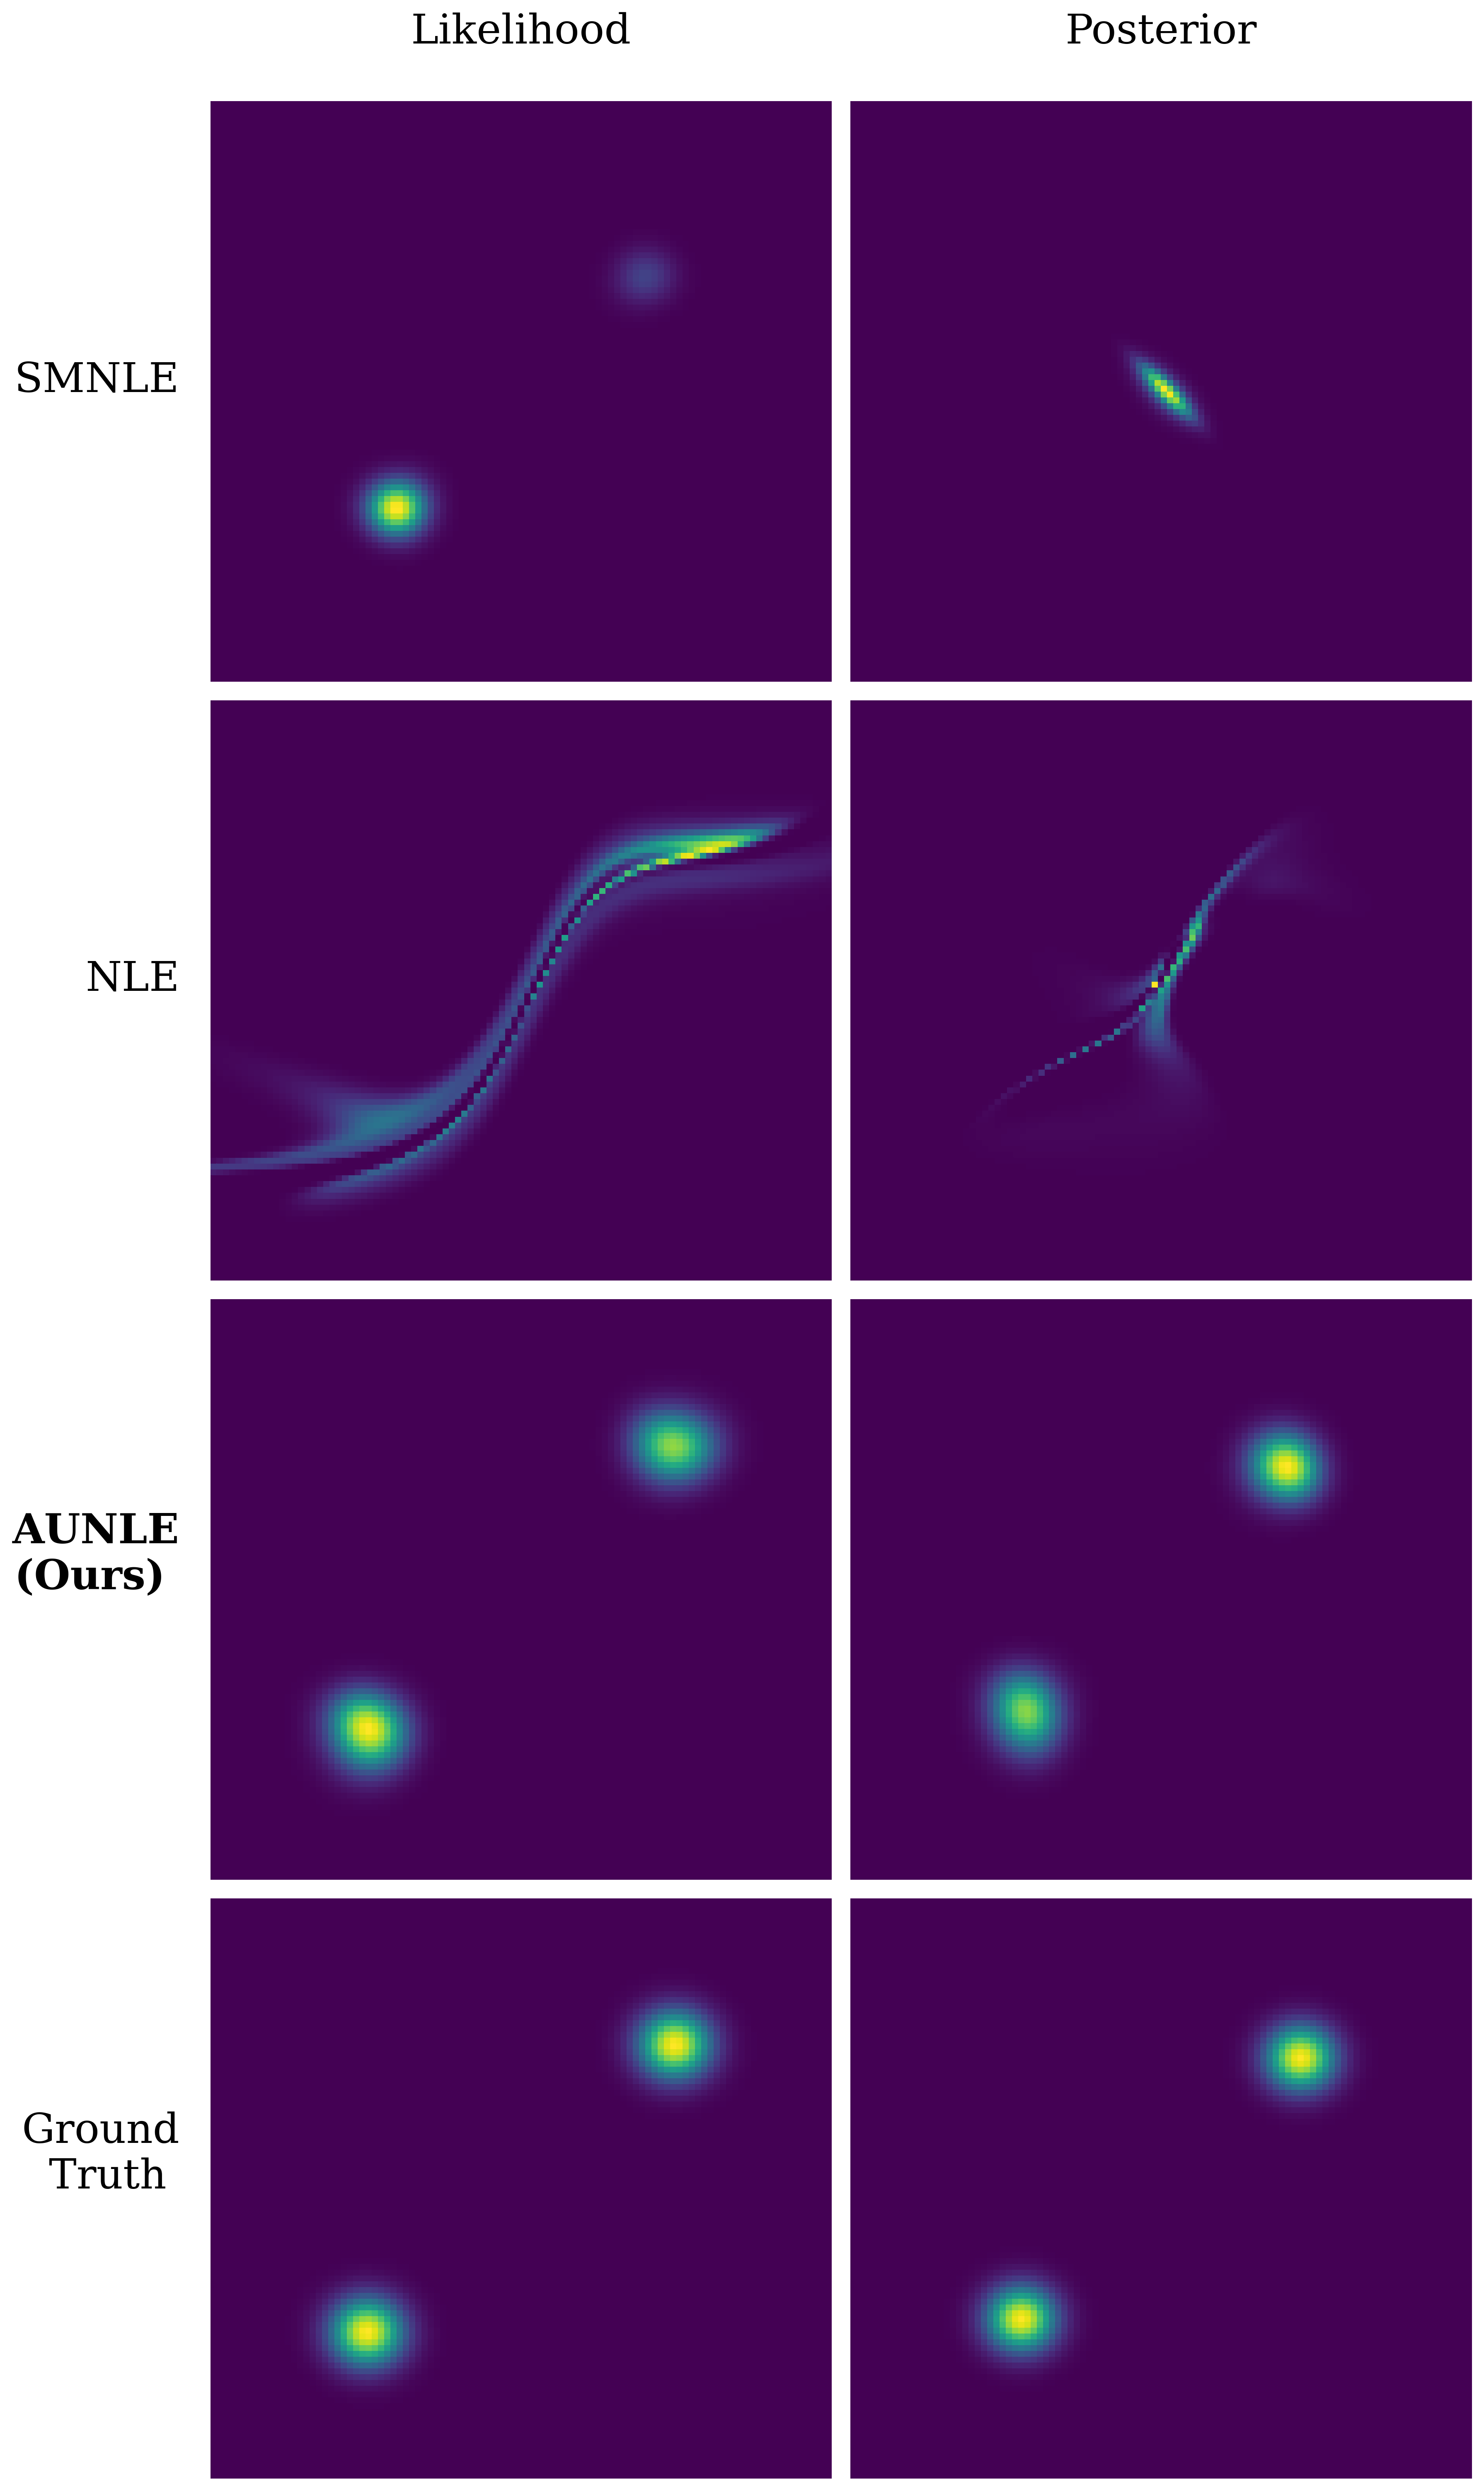

In [6]:
import jax.numpy as jnp
import torch
from density_utils.plotting import plot_densities
from density_utils import plotting
import matplotlib.pyplot as plt
import torch

plt.style.use("paper.mplstyle")
plt.rcParams.update({
    "text.usetex": False,
    # "font.family": "Helvetica"
})

nbins = 100

from sbi_ebm.sbibm.tasks import get_task, JaxTask
t = get_task("MultiModalLikelihoodTask")

f, axs  = plt.subplots(figsize=(12, 20), ncols=2, nrows=4)


# _ = axs[0, 0].axis('off')

plot_densities({"sm": lambda x:  ret.train_results.single_round_results[0].jax_log_likelihood(jnp.zeros((2,)), x)}, bounds=((-5,5), (-5,5)), nbins=nbins, log_space=True, axs=axs[:1, 0], batch_size=10)
plot_densities({"sm":  smnle_normalized_posterior}, bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[0, 1:], batch_size=10)


_ = plotting.plot_density_pytorch(
((-4 ,4), (-4, 4)),
lambda x: (ret_snle_maf.train_results.posterior.flow.log_prob(theta=torch.zeros((2,)), x=x)[0]).exp(), nbins=nbins, ax=axs[1, 0]
)

_ = plotting.plot_density_pytorch(((-4 ,4), (-4, 4)), lambda theta: ret_snle_maf.train_results.posterior.flow.log_prob(theta)[0].exp(), nbins=nbins, ax=axs[1, 1])


plot_densities(
    {"sm": lambda x:  ret_aunle.train_results.single_round_results[0].get_posterior(99)._log_likelihood(jnp.zeros((2,)), x)},
    bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[2, :1], batch_size=10
)
plot_densities(
    {"sm":  ret_aunle.train_results.single_round_results[0].get_posterior(99).log_prob}, bounds=((-4, 4), (-4,4)), nbins=nbins,
    log_space=True, axs=axs[2, 1:], batch_size=10
)

# plot_densities({"sm":  sunle_normalized_posterior}, bounds=((-4, 4), (-4,4)), nbins=100, log_space=True, axs=axs[0, 1:], batch_size=10)


plot_densities(
    {"sm":  lambda x: t._jax_log_likelihood(jnp.zeros((2,)), x)}, bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[3, :1], batch_size=10
)

plot_densities(
    {"sm":  lambda theta: JaxTask(t).get_prior_dist().log_prob(theta) +  t._jax_log_likelihood(theta, jnp.zeros((2,)))},
    bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[3, 1:], batch_size=10
)
# # plot_densities({"sm": lambda x:  ret.single_round_results[0].jax_log_likelihood(jnp.zeros((2,)), x)}, bounds=((-4,4), (-4,4)), nbins=40, log_space=True, axs=axs)
# # 

for rax in axs:
    for ax in rax:
        ax.axis('off')

axs[0, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="SMNLE", transform=axs[0, 0].transAxes)
axs[1, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="NLE", transform=axs[1, 0].transAxes)
axs[2, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="AUNLE\n(Ours) ", transform=axs[2, 0].transAxes, fontweight="bold")
axs[3, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="Ground\nTruth ", transform=axs[3, 0].transAxes)

axs[0, 0].text(y=1.1, x=0.5, size=24, horizontalalignment='center', s="Likelihood", transform=axs[0, 0].transAxes)
axs[0, 1].text(y=1.1, x=0.5, size=24, horizontalalignment='center', s="Posterior", transform=axs[0, 1].transAxes)

f.tight_layout()
f.savefig('multimodal_posterior_fig_icml.png', dpi=300)

In [17]:
from sbi_ebm.samplers.inference_algorithms.mcmc.base import MCMCAlgorithm, MCMCConfig
from sbi_ebm.samplers.kernels.savm import SAVMKernelFactory, SAVMConfig
from sbi_ebm.samplers.kernels.exact_savm import ExactSAVMKernelFactory, ExactSAVMConfig
from sbi_ebm.samplers.kernels.mala import MALAKernelFactory, MALAConfig
from sbi_ebm.samplers.kernels.rwmh import RWKernelFactory, RWConfig
from sbi_ebm.samplers.kernels.numpyro_nuts import NUTSKernelFactory, NUTSConfig

from jax import jit, random
import jax.numpy as jnp
import jax
from sbi_ebm.distributions import maybe_wrap
from sbi_ebm.sbibm.tasks import JaxTask, get_task

In [18]:
JaxTask(get_task("MultiModalLikelihoodTask")).get_observation(1)

DeviceArray([[0., 0.]], dtype=float32)

In [19]:
from sbi_ebm.distributions import DoublyIntractableLogDensity, maybe_wrap_log_l
z_scored_posterior = DoublyIntractableLogDensity(
    log_prior=maybe_wrap(lambda x: JaxTask(get_task("MultiModalLikelihoodTask")).get_prior_dist().log_prob(x)),
    log_likelihood=maybe_wrap_log_l(ret.train_results.single_round_results[0].jax_log_likelihood),
    # x_obs=posterior.x_transform.inv(posterior.x)
    # x_obs=posterior.x_transform.inv(posterior.x)
    x_obs=JaxTask(get_task("MultiModalLikelihoodTask")).get_observation(1)[0]
)

In [45]:
kf = SAVMKernelFactory(
    config=SAVMConfig(
        base_var_kernel_factory=RWKernelFactory(config=RWConfig(step_size=1., C=jnp.eye(2))),
        aux_var_kernel_factory=RWKernelFactory(RWConfig(step_size=0.1, C=None)),
        # aux_var_kernel_factory=NUTSKernelFactory(NUTSConfig(step_size=0.1, C=None)),
        # aux_var_kernel_factory=MALAKernelFactory(MALAConfig(step_size=0.01, C=None)),
        aux_var_num_inner_steps=10000,
        aux_var_init_strategy="x_obs",
    )
)
# alg_savm = MCMCAlgorithm.create(
#     config=MCMCConfig(num_samples=1000, record_trajectory=True, kernel_factory=kf, num_warmup_steps=500,
#                       adapt_step_size=True, adapt_mass_matrix=True, progress_bar=True,
#                       target_accept_rate=0.8, warmup_method="numpyro", thinning_factor=10),
#     log_prob=z_scored_posterior)
# kf = ExactSAVMKernelFactory(config=ExactSAVMConfig( base_var_kernel_factory=RWKernelFactory(config=RWConfig(step_size=1., C=jnp.eye(2))), ) )
# kf = MALAKernelFactory(config=MALAConfig(step_size=0.01, C=jnp.ones((5,))))
# kf = MALAKernelFactory(config=MALAConfig(step_size=0.1))

alg_savm = MCMCAlgorithm.create(
    config=MCMCConfig(num_samples=1000, record_trajectory=True, kernel_factory=kf, num_warmup_steps=100,
                      adapt_step_size=True, adapt_mass_matrix=True, progress_bar=True,
                      target_accept_rate=0.8, warmup_method="numpyro", thinning_factor=1), log_prob=z_scored_posterior)

In [46]:
from sbi_ebm.sbibm.tasks import JaxTask, get_task
from numpyro.distributions import TransformedDistribution
from jax import jit
key = random.PRNGKey(0)
key, subkey = random.split(key)
# alg_savm = alg_savm.init_from_particles(TransformedDistribution(t.get_prior_dist(), posterior.z_transform.inv).sample(key=subkey, sample_shape=(alg_savm.config.num_chains,)))

alg_savm = alg_savm.init(key=subkey, dist=JaxTask(get_task("MultiModalLikelihoodTask")).get_prior_dist())
# alg_savm = alg_savm.init_from_particles(jnp.zeros((100, 2)))

key, subkey = random.split(key)
alg_savm, results_savm = jit(alg_savm.run)(subkey)

  0%|          | 0/11000 [00:00<?, ?it/s]

In [48]:
from sbi_ebm.sbibm.tasks import get_task
import deneb as den
from sbibm.visualisation import fig_posterior
import numpy as np
import torch

i = -1

f = fig_posterior(
    # samples_tensor=result.result.train_results.posterior_samples,
    # samples_tensor=result.result.single_round_results[i].posterior_samples,
    # samples_tensor=result.result.single_round_results[0].train_theta,
    samples_tensor=torch.from_numpy(np.array(results_savm.samples.particles)),
    num_samples=min(len(results_savm.samples.particles), 1000),
    # task_name=result.result.train_results.config['task'],
    # task=get_task(result.result.train_results.config['task'])
    # task_name="LDCT",
    # task=get_task("LDCT")
    task_name="MultiModalLikelihoodTask",
    task=get_task("MultiModalLikelihoodTask"),
    num_observation=1
)

den.set_style(width=150, height=150)
f

alt.VConcatChart(...)